# Importing the desired dataset from roboflow

In [2]:
!pip install roboflow
import tensorflow as tf
from roboflow import Roboflow
rf = Roboflow(api_key="03HmTIvn5dEwIF3rs3YU")
project = rf.workspace("graduation-project-omxir").project("skin-cancer-detection-nty7c")
dataset = project.version(2).download("yolov8")

  Obtaining dependency information for roboflow from https://files.pythonhosted.org/packages/95/da/72fda7a49ec81e369654eb6cfa733ec6e1ee87a7d1ed6a154c4cf6bf9c1d/roboflow-1.1.12-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
  Obtaining dependency information for opencv-python-headless==4.8.0.74 from https://files.pythonhosted.org/packages/76/02/f128517f3ade4bb5f71e2afd8461dba70e3f466ce745fa1fd1fade9ad1b7/opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.5 MB/s eta 0:00:00
  Obtaining dependency information for supervision from https://files.pythonhosted.org/packages/32/bc/8a49af935c9974c4900cb8411c56ae57ab316825bb2550457341de5f776d/supervision-0.17.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 9.0 MB/s e

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Skin-Cancer-Detection-2 in yolov8:: 100%|██████████| 9858/9858 [00:01<00:00, 8478.97it/s] 


# importing the main libraries

In [3]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Data preprocessing and handling
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

#Deep learning libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

#Warningds
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_path = '/kaggle/working/Skin-Cancer-Detection-2/train'
filepaths =[]
labels = []

folds = os.listdir(train_path)

for fold in folds:
    f_path = os.path.join(train_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
train_df = pd.concat([Fseries , Lseries] , axis = 1)

In [4]:
train_df

filepaths   label
0     /kaggle/working/Skin-Cancer-Detection-2/train/...  labels
1     /kaggle/working/Skin-Cancer-Detection-2/train/...  labels
2     /kaggle/working/Skin-Cancer-Detection-2/train/...  labels
3     /kaggle/working/Skin-Cancer-Detection-2/train/...  labels
4     /kaggle/working/Skin-Cancer-Detection-2/train/...  labels
...                                                 ...     ...
8611  /kaggle/working/Skin-Cancer-Detection-2/train/...  images
8612  /kaggle/working/Skin-Cancer-Detection-2/train/...  images
8613  /kaggle/working/Skin-Cancer-Detection-2/train/...  images
8614  /kaggle/working/Skin-Cancer-Detection-2/train/...  images
8615  /kaggle/working/Skin-Cancer-Detection-2/train/...  images

[8616 rows x 2 columns]

In [5]:
test_path = '/kaggle/working/Skin-Cancer-Detection-2/test'

filepaths =[]
labels = []

folds = os.listdir(test_path)

for fold in folds:
    f_path = os.path.join(test_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
test_df = pd.concat([Fseries , Lseries] , axis = 1)

In [6]:
test_df

filepaths   label
0    /kaggle/working/Skin-Cancer-Detection-2/test/l...  labels
1    /kaggle/working/Skin-Cancer-Detection-2/test/l...  labels
2    /kaggle/working/Skin-Cancer-Detection-2/test/l...  labels
3    /kaggle/working/Skin-Cancer-Detection-2/test/l...  labels
4    /kaggle/working/Skin-Cancer-Detection-2/test/l...  labels
..                                                 ...     ...
405  /kaggle/working/Skin-Cancer-Detection-2/test/i...  images
406  /kaggle/working/Skin-Cancer-Detection-2/test/i...  images
407  /kaggle/working/Skin-Cancer-Detection-2/test/i...  images
408  /kaggle/working/Skin-Cancer-Detection-2/test/i...  images
409  /kaggle/working/Skin-Cancer-Detection-2/test/i...  images

[410 rows x 2 columns]

In [7]:
valid , test = train_test_split(test_df , train_size = 0.5 , shuffle = True , random_state= 42)

In [8]:
img_size = (254 ,254)
batch_size = 16

train_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()
valid_gen = ImageDataGenerator()

train_gen = train_gen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)

test_gen = test_gen.flow_from_dataframe(test , x_col= 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)

valid_gen = valid_gen.flow_from_dataframe(valid , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)

Found 4308 validated image filenames belonging to 1 classes.
Found 94 validated image filenames belonging to 1 classes.
Found 111 validated image filenames belonging to 1 classes.


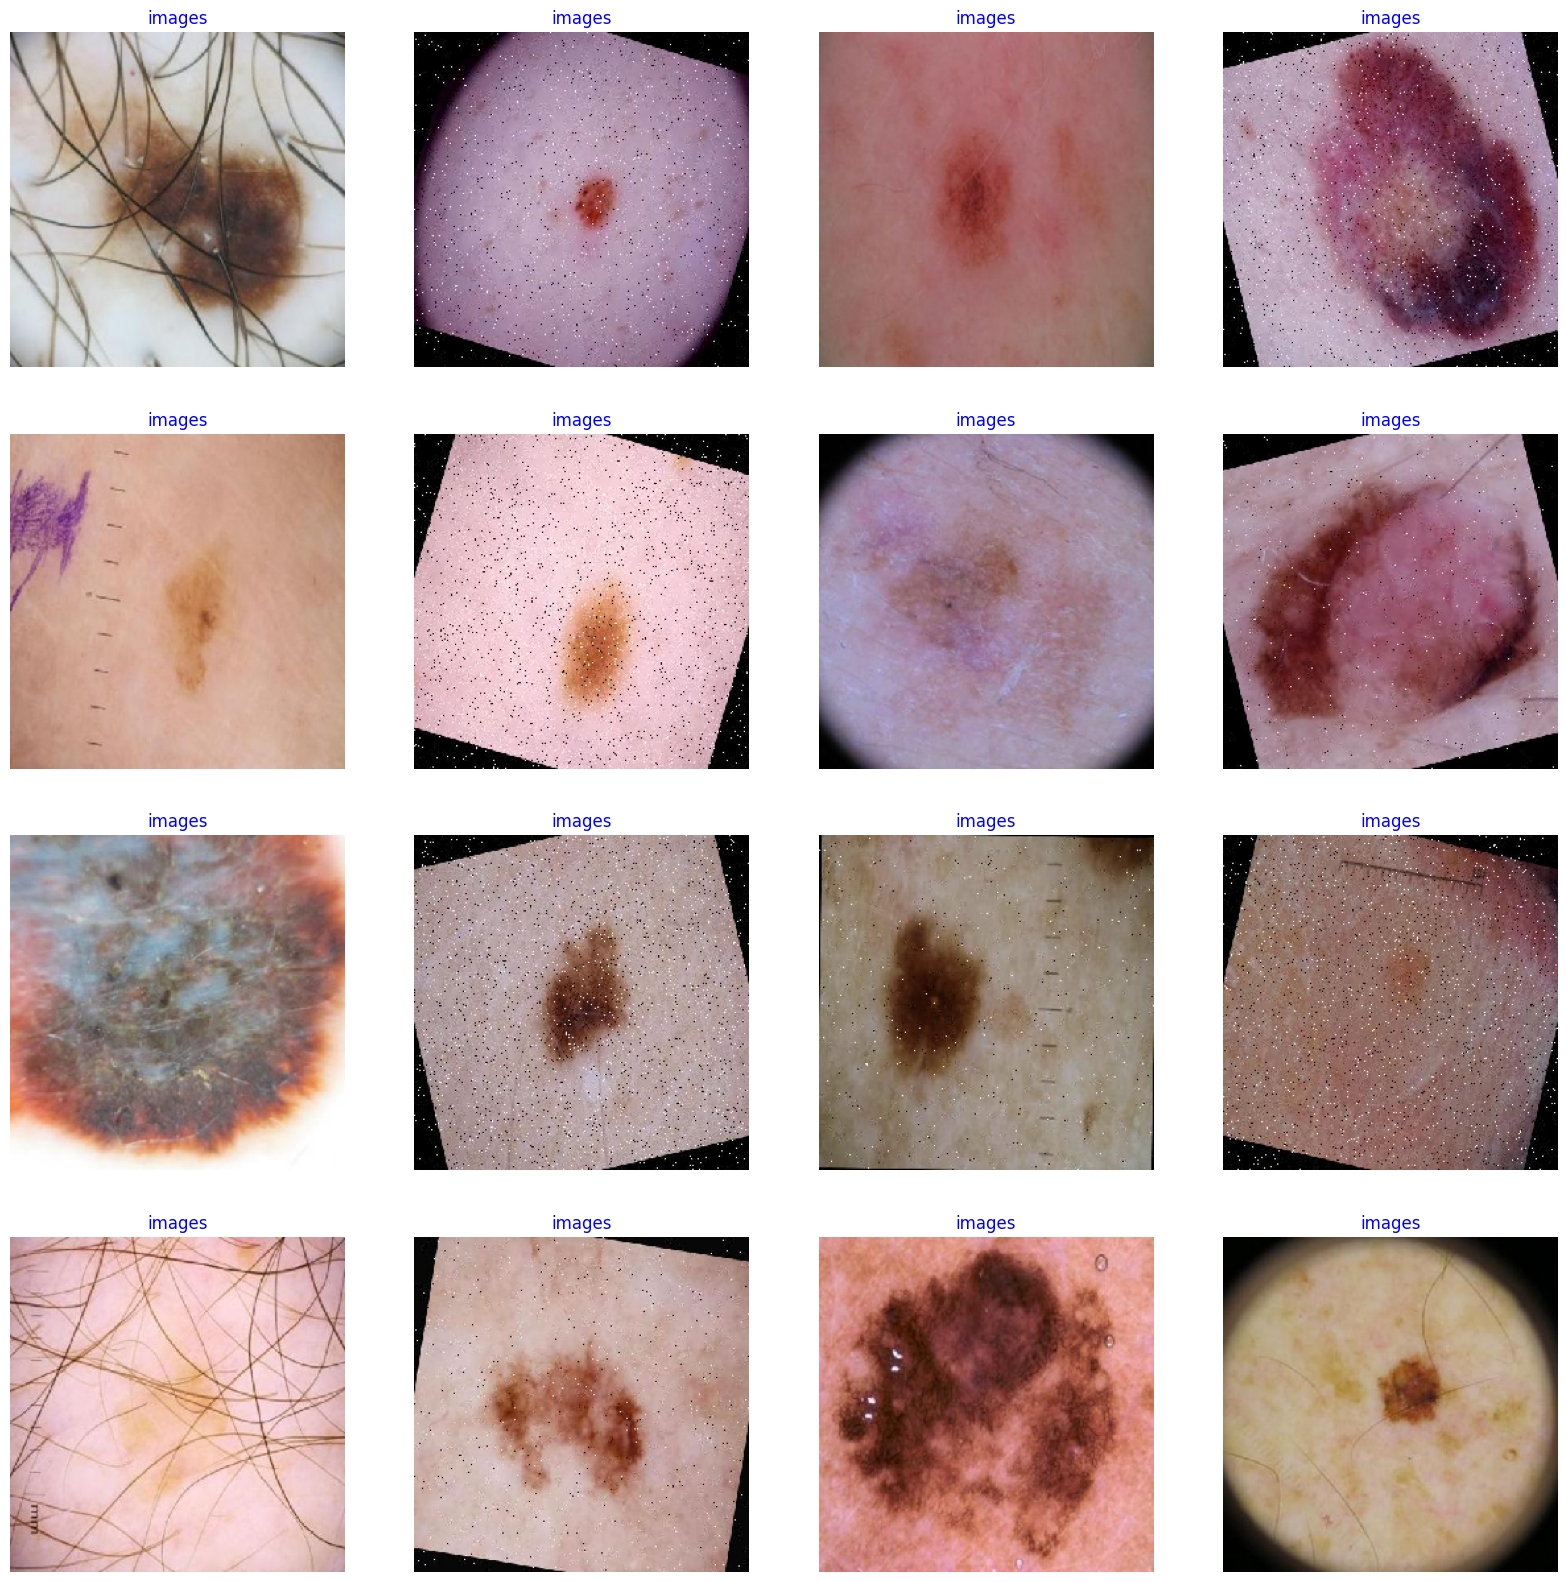

In [9]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'blue' , fontsize= 12)
    plt.axis('off')
plt.show();

# Importing the important libraries and packages needed for training using YOLOv8 from Ultralytics library

In [5]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.6 MB/s eta 0:00:00:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install --upgrade tensorflow-io

In [7]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.4/659.4 kB 32.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
from ultralytics import YOLO
model1 = YOLO('yolov8x')
from IPython.display import display, Image

100%|██████████| 131M/131M [00:00<00:00, 327MB/s] 


In [9]:
model1.train(data = '/kaggle/input/data-y/data.yaml',epochs = 20)


Ultralytics YOLOv8.0.223 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/data-y/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, for

100%|██████████| 755k/755k [00:00<00:00, 99.9MB/s]
2023-12-07 21:53:17,102	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2023-12-07 21:53:17,532	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 28.8MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Skin-Cancer-Detection-2/train/labels... 4308 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4308/4308 [00:03<00:00, 1098.17it/s]


train: New cache created: /kaggle/working/Skin-Cancer-Detection-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/Skin-Cancer-Detection-2/valid/labels... 410 images, 0 backgrounds, 0 corrupt: 100%|██████████| 410/410 [00:00<00:00, 1495.45it/s]

val: New cache created: /kaggle/working/Skin-Cancer-Detection-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      15.2G      1.691      2.035      2.031          7        640: 100%|██████████| 270/270 [06:44<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:13<00:00,  1.01s/it]

                   all        410        448      0.189      0.539      0.162      0.067



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20        14G      1.667      1.826      1.978         16        640: 100%|██████████| 270/270 [06:40<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        410        448      0.523      0.541      0.483      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      13.1G      1.591      1.726      1.905         13        640: 100%|██████████| 270/270 [06:29<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        410        448      0.402      0.413      0.333      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      13.1G      1.514      1.576      1.853         12        640: 100%|██████████| 270/270 [06:30<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        410        448      0.608      0.601      0.607      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20        14G      1.478       1.53      1.812          6        640: 100%|██████████| 270/270 [06:31<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

                   all        410        448      0.701      0.679      0.707      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      13.9G      1.436      1.474      1.773         12        640: 100%|██████████| 270/270 [06:29<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        410        448      0.757      0.694       0.76      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      14.4G      1.406      1.397      1.735          5        640: 100%|██████████| 270/270 [06:38<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        410        448      0.658      0.619      0.655      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      13.2G      1.371      1.361      1.714         12        640: 100%|██████████| 270/270 [06:30<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        410        448      0.773      0.748      0.781      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      13.7G      1.353      1.314      1.697          6        640: 100%|██████████| 270/270 [06:30<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        410        448      0.702      0.664      0.697        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      13.5G      1.347      1.301      1.689         14        640: 100%|██████████| 270/270 [06:30<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        410        448      0.792      0.719      0.798      0.444


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      14.2G      1.393      1.145      1.916          4        640: 100%|██████████| 270/270 [06:31<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        410        448       0.79      0.721      0.767      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      13.3G      1.339      1.123      1.864          5        640: 100%|██████████| 270/270 [06:30<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        410        448      0.758      0.728      0.782      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      13.8G      1.311      1.075       1.84          5        640: 100%|██████████| 270/270 [06:29<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        410        448      0.758      0.704      0.774       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      13.3G      1.287      1.028       1.82          4        640: 100%|██████████| 270/270 [06:30<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        410        448      0.765      0.751      0.795      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      13.3G      1.271      1.002      1.796          6        640: 100%|██████████| 270/270 [06:30<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        410        448      0.795      0.744      0.787       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      12.9G      1.244     0.9764      1.768          5        640: 100%|██████████| 270/270 [06:30<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        410        448      0.717      0.704       0.76      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      13.3G      1.228     0.9509       1.76          4        640: 100%|██████████| 270/270 [06:30<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        410        448      0.748      0.768      0.806      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      13.3G      1.211     0.9296      1.736          4        640: 100%|██████████| 270/270 [06:30<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        410        448      0.793       0.74      0.789      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      13.9G      1.196     0.9029       1.72          4        640: 100%|██████████| 270/270 [06:38<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

                   all        410        448      0.783      0.761      0.804      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      13.7G      1.174     0.8912        1.7          5        640: 100%|██████████| 270/270 [06:29<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        410        448       0.81      0.781      0.824      0.501



20 epochs completed in 2.273 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.223 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 268 layers, 68125494 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]


                   all        410        448      0.811      0.784      0.823      0.501
                Benign        410        225      0.789      0.769      0.765      0.381
             Malignant        410        223      0.832      0.799      0.882      0.621
Speed: 0.7ms preprocess, 26.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e7fb337d420>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# training confusion matrix:

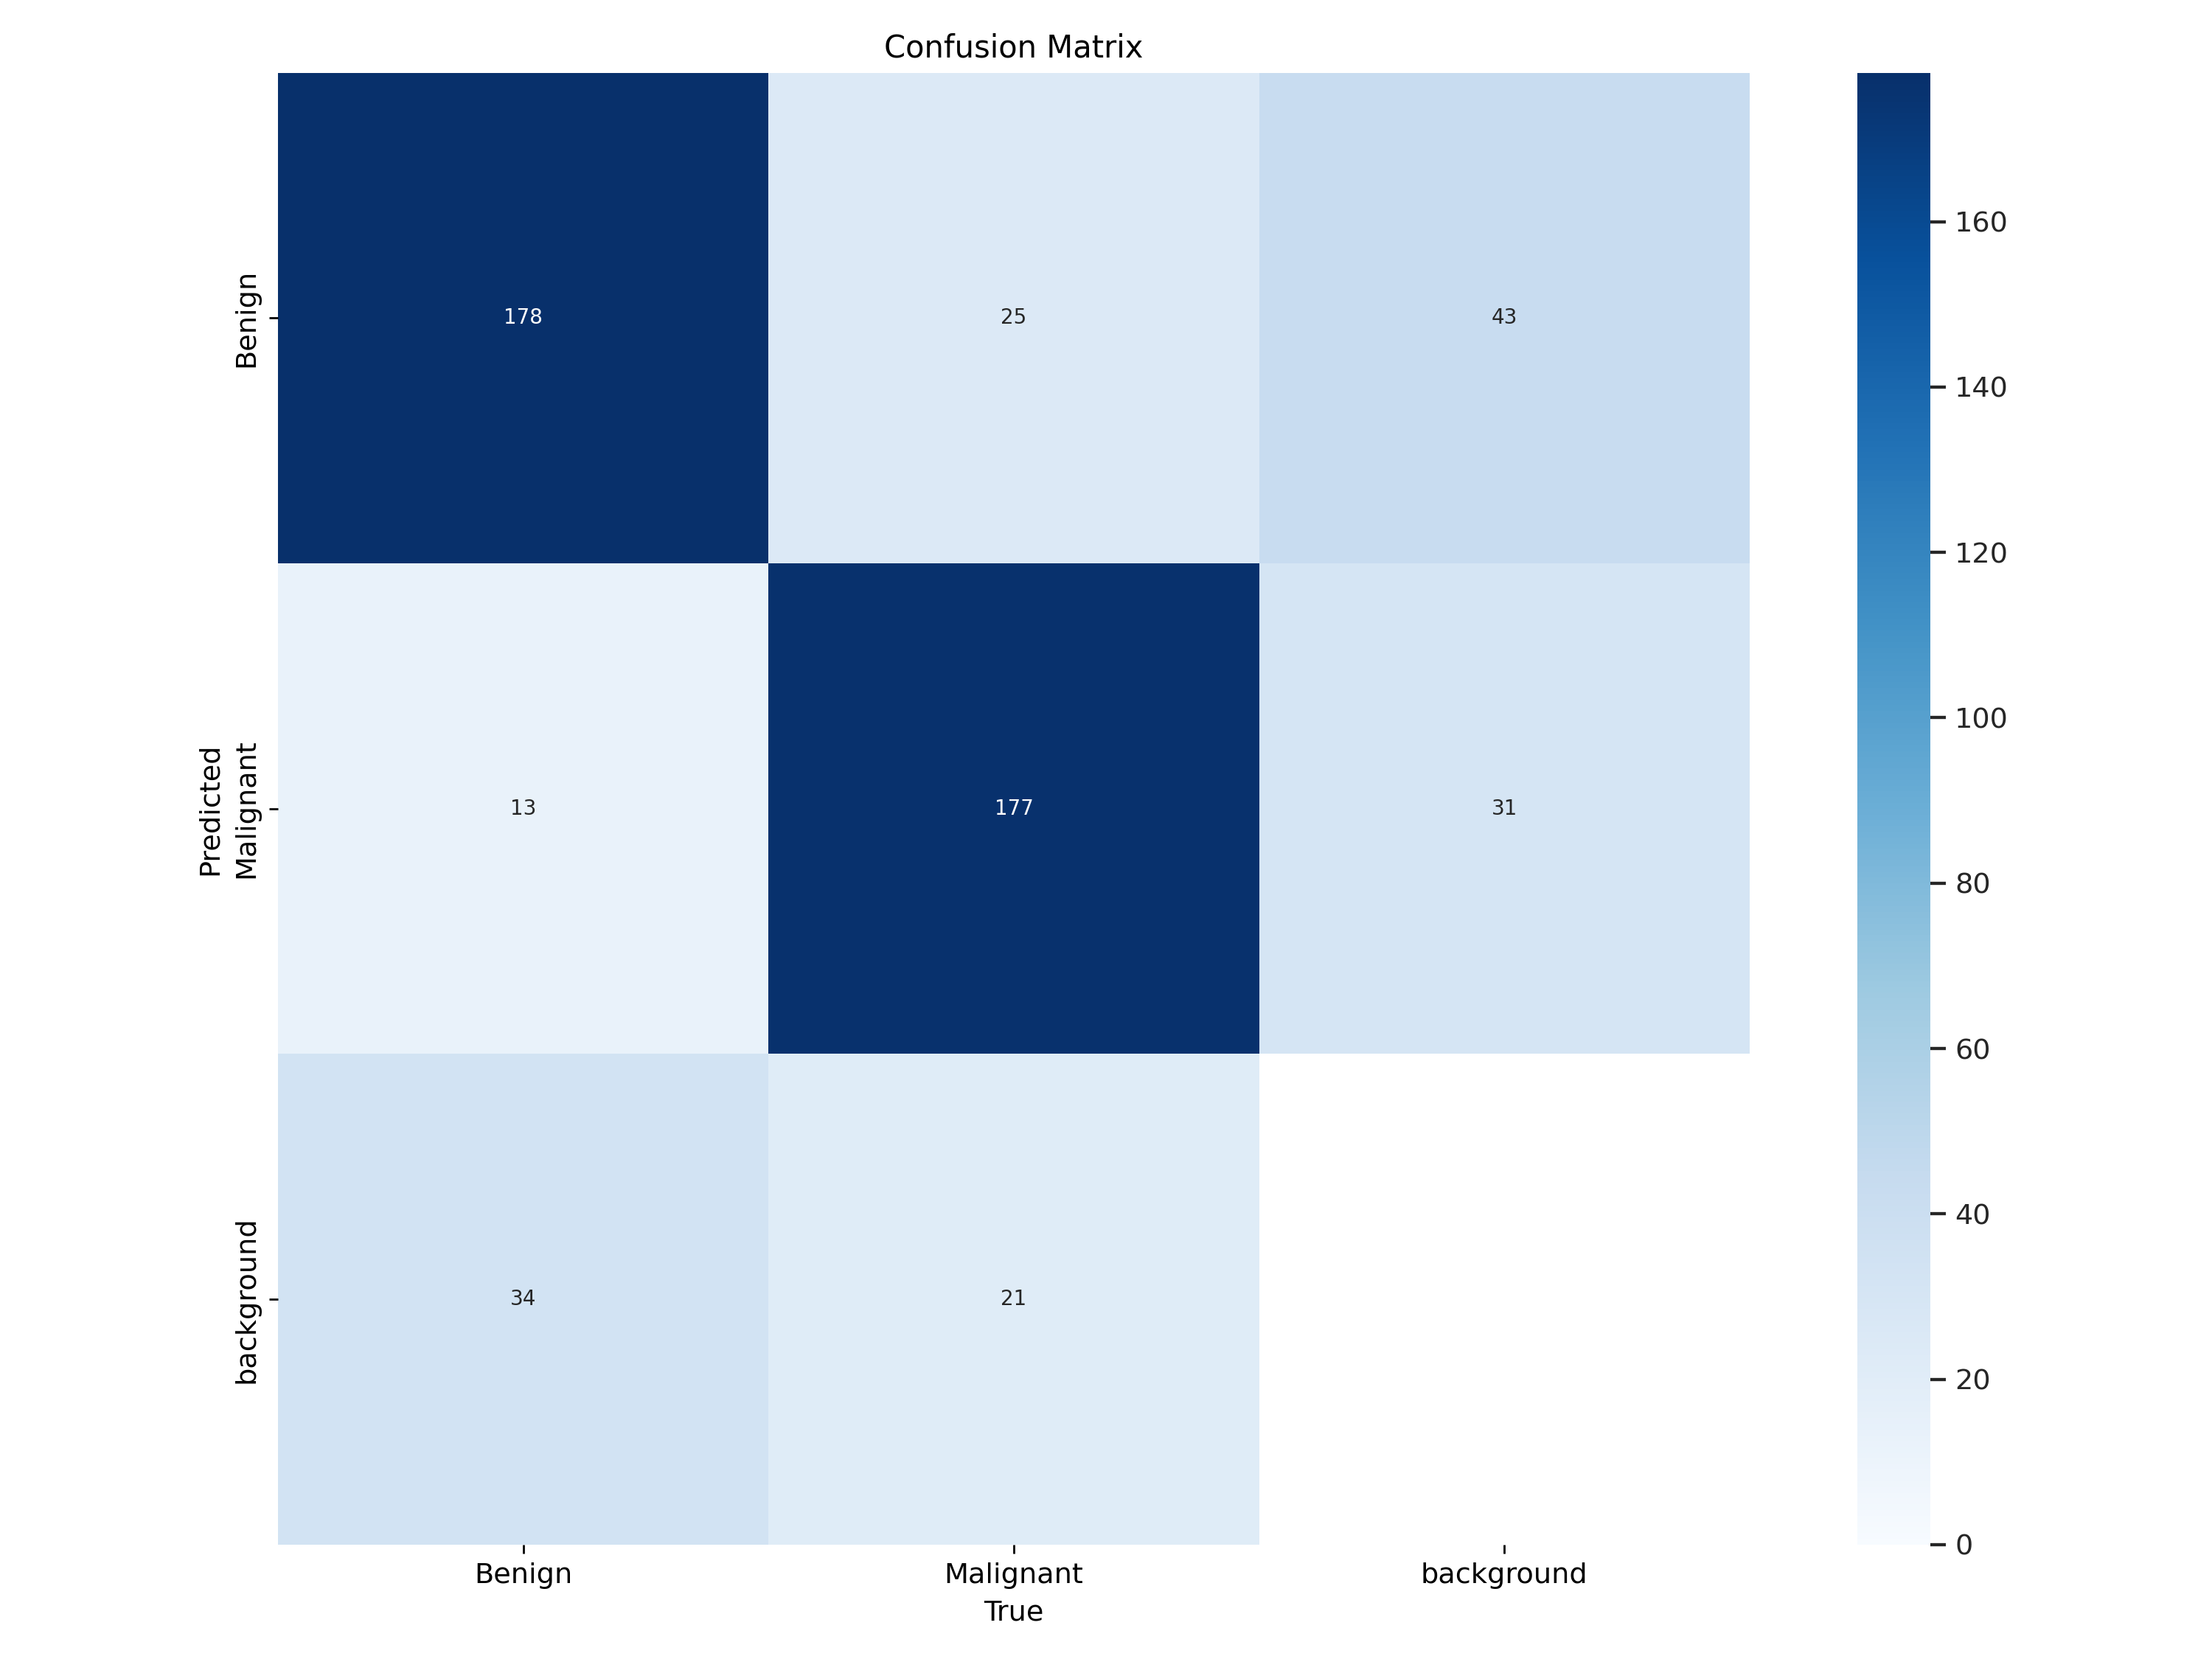

In [49]:
Image(filename='/kaggle/working/runs/detect/train/confusion_matrix.png',width=600)

# *Percision curve:*

This image is a graph of a precision-recall curve. It’s a plot used to evaluate the performance of a model in terms of its ability to correctly classify data points as either positive or negative.

The x-axis represents recall and the y-axis represents precision. The graph has three lines: blue, orange, and red.

The blue line represents the performance of the model for benign data points.
The orange line represents the performance of the model for malignant data points.
The red line represents the performance of the model for all data points.
The area under the curve (AUC) is 0.823 for all data points. This value is a single number summary of the precision-recall curve and it provides an aggregate measure of performance across all possible classification thresholds. A model with perfect precision and recall would have an AUC of 1.0. So, an AUC of 0.823 indicates a good performance of the model.

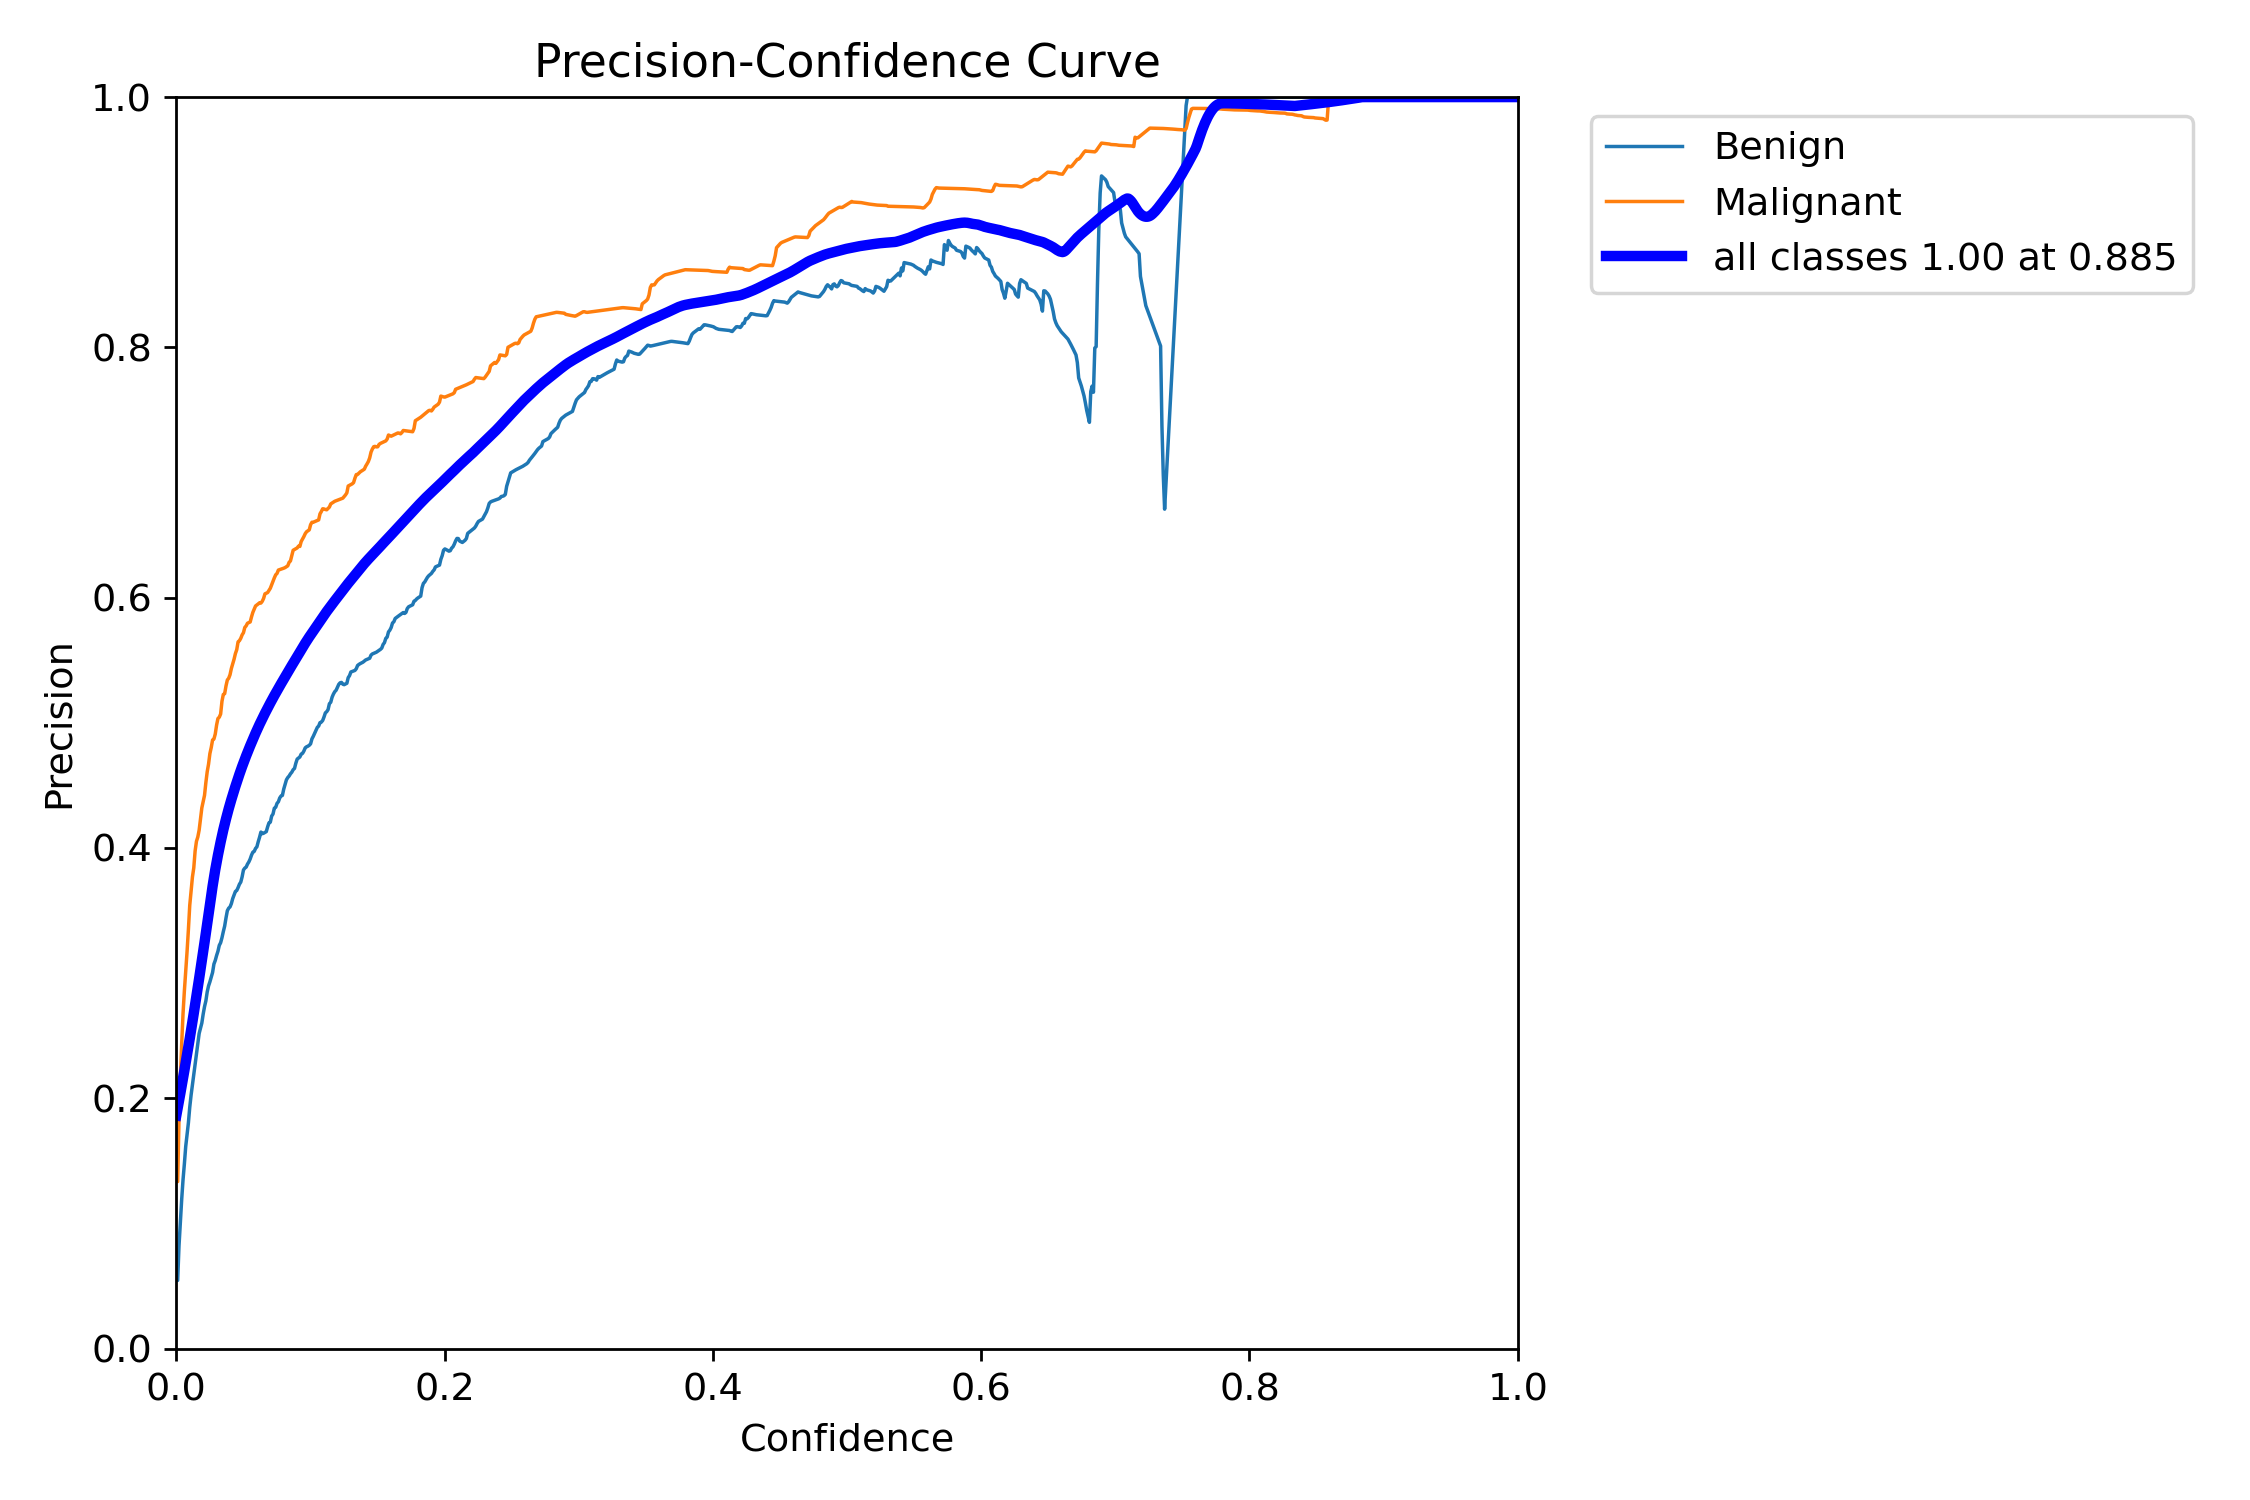

In [26]:
Image(filename='/kaggle/working/runs/detect/val/P_curve.png',width=600)

# F1-score curve:

This image is a graph showing the relationship between F1 score and confidence for two classes, benign and malignant. The F1 score is a measure of a model’s accuracy, and it considers both the precision and the recall of the model. The confidence is a measure of how certain the model is about its predictions.

The graph has a blue solid line and a blue dotted line:

The blue solid line represents the class “Benign”. It has a peak at around 0.8 F1 and 0.6 confidence, which means the model is most accurate and confident when predicting benign cases at these values.
The blue dotted line represents the class “Malignant”. It has a peak at around 0.6 F1 and 0.8 confidence, indicating the model’s optimal performance for malignant cases.
There are also two other lines:

The black dashed line labeled “mean” seems to be the average of the two classes, providing an overall measure of the model’s performance.
The gray solid line labeled “train” seems to represent the performance of the model on the training data, which can be used to check for overfitting or underfitting.

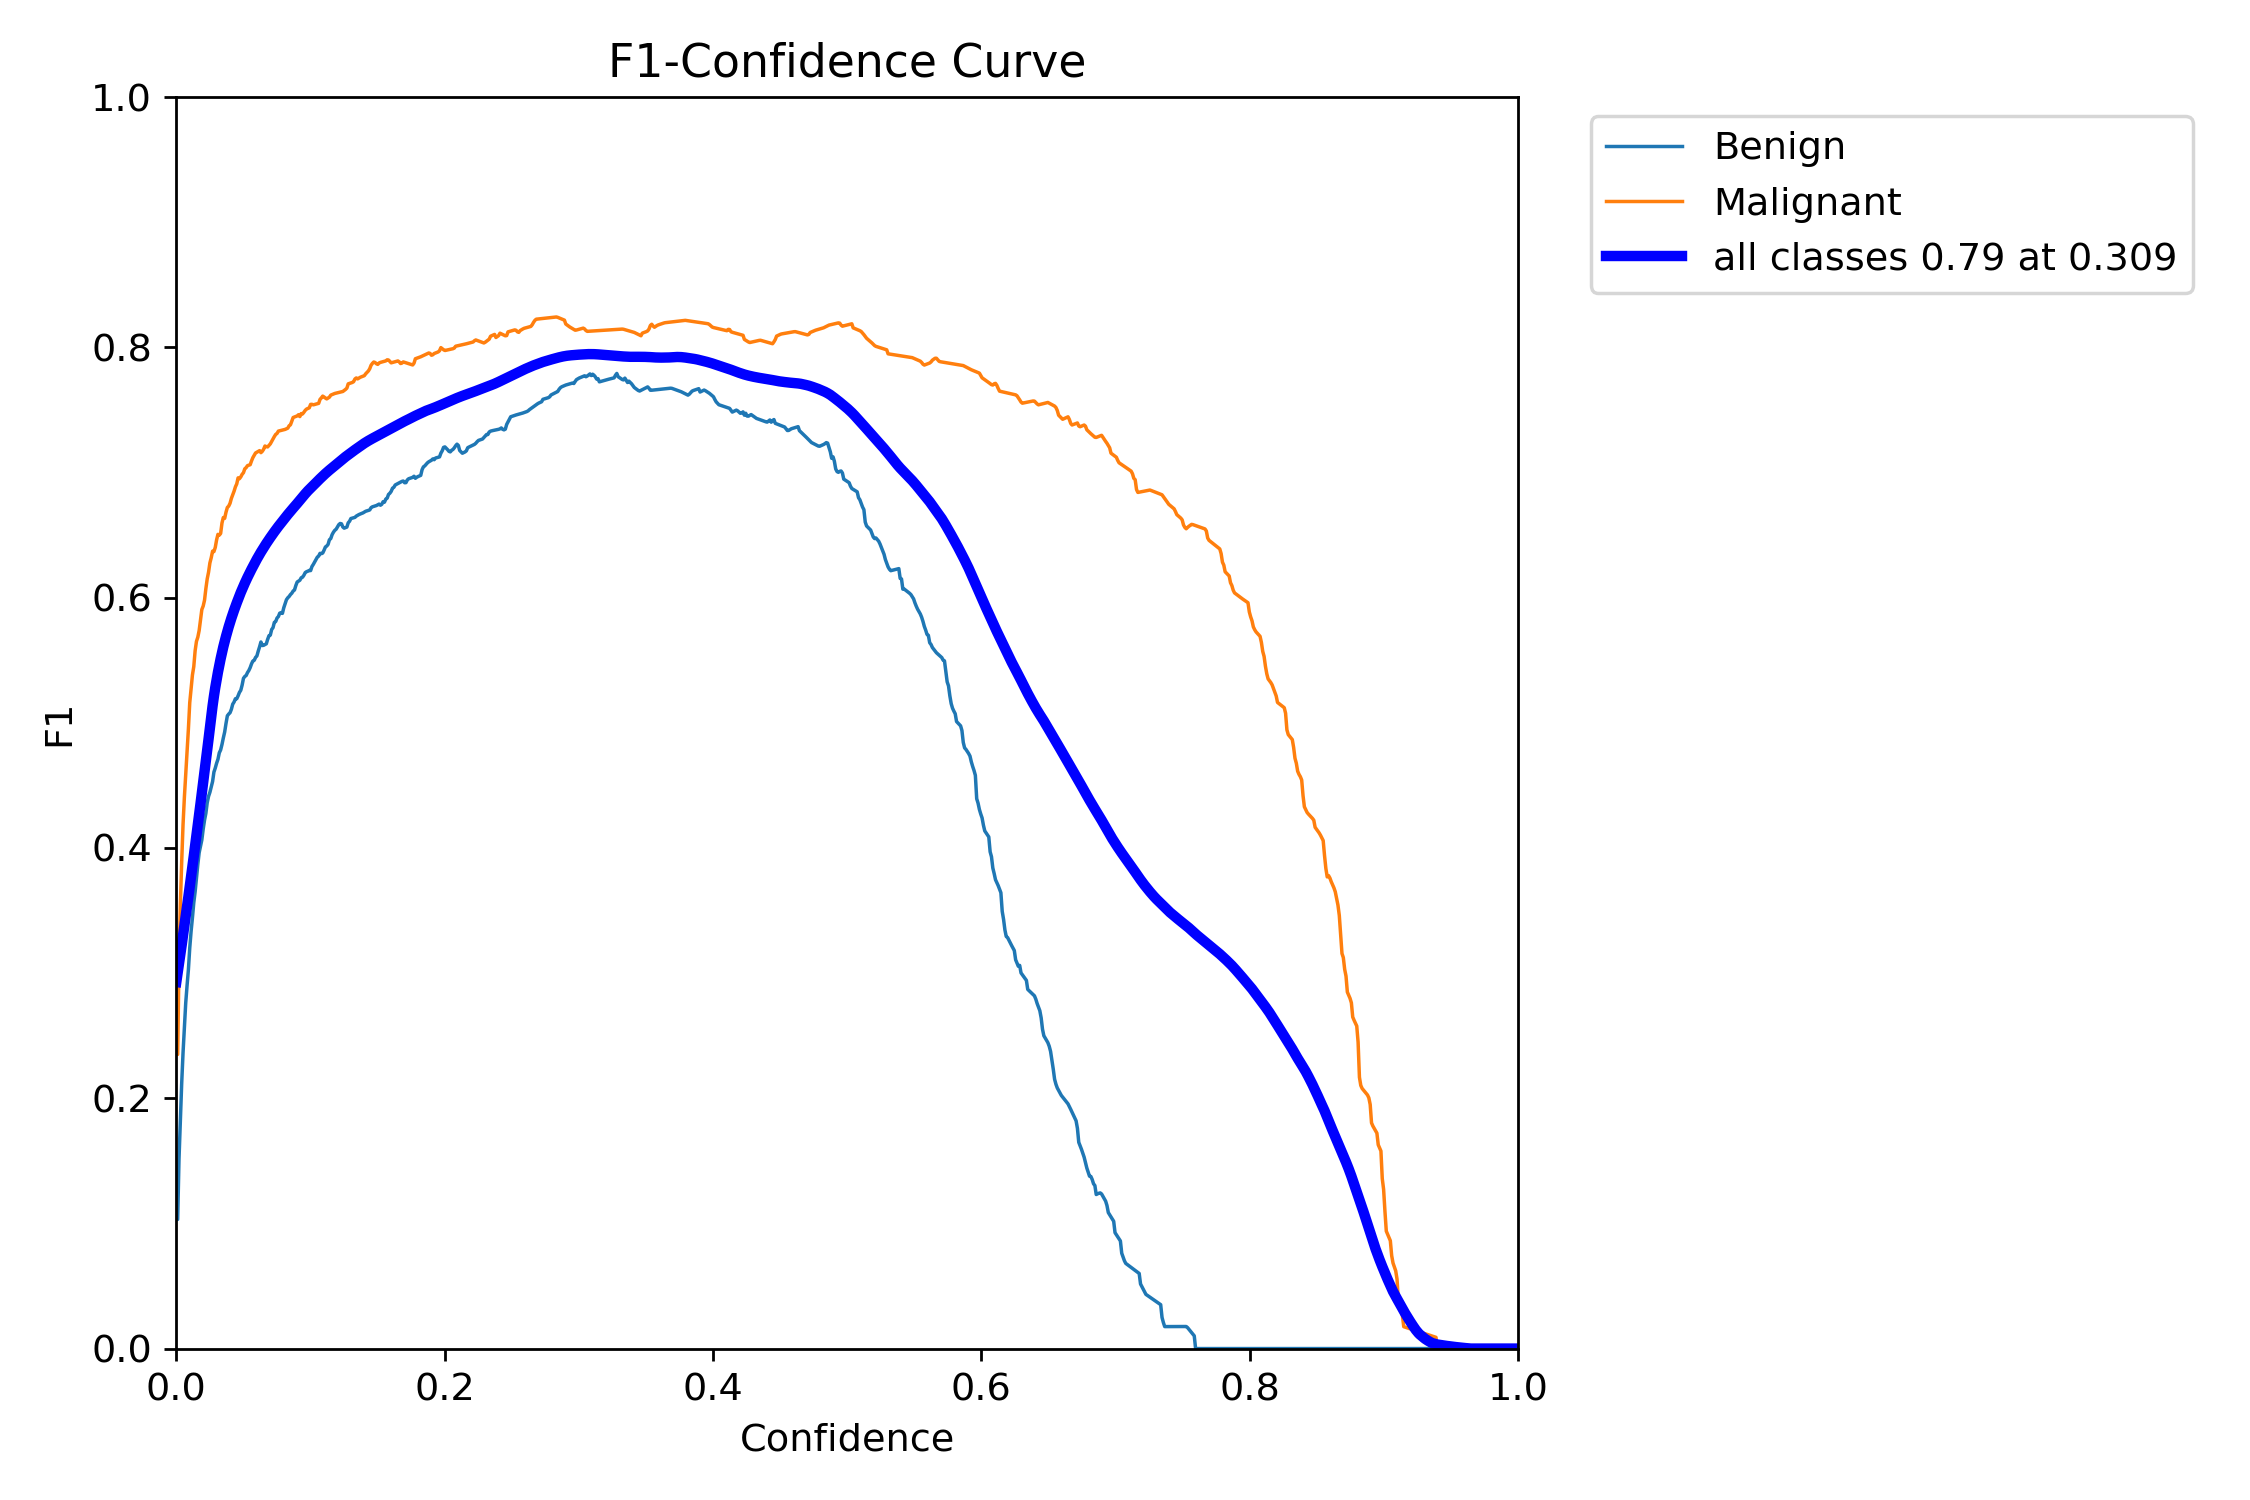

In [28]:
Image(filename='/kaggle/working/runs/detect/val/F1_curve.png',width=600)

# Results Summary

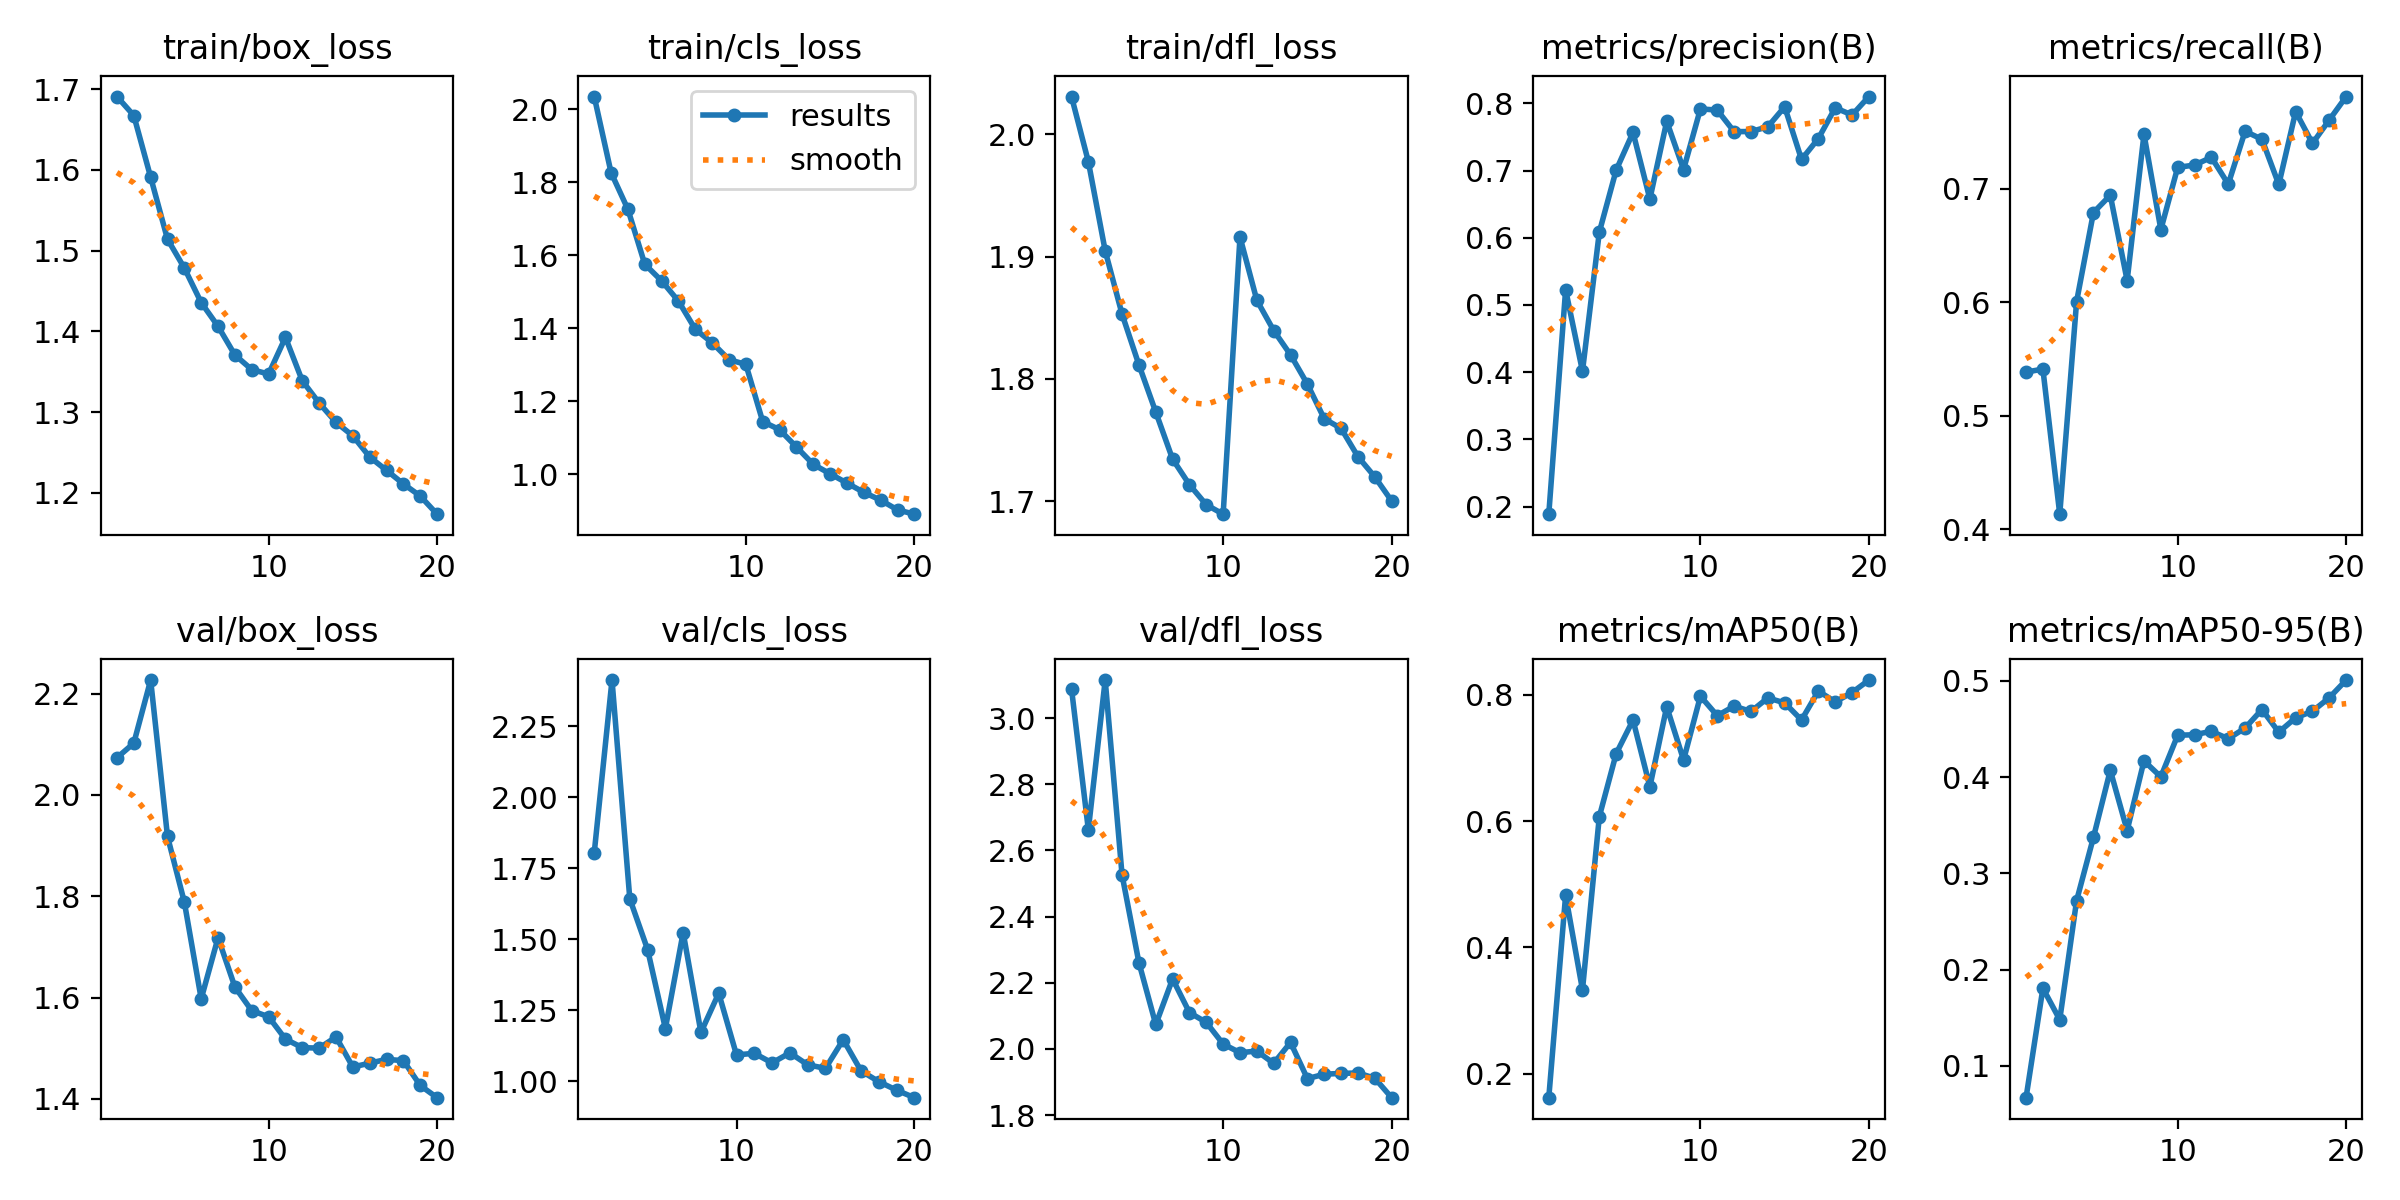

In [29]:
Image(filename='/kaggle/working/runs/detect/train/results.png',width=600)

# Recall curve :

This image is a graph of a recall-confidence curve. It’s a plot of the recall and confidence values for a binary classifier system.

The x-axis represents the confidence and the y-axis represents the recall. The blue line represents the benign class and the orange line represents the malignant class. The black line represents all classes.

The recall-confidence curve is used to evaluate the performance of a binary classifier system. Recall is a measure of a model’s ability to find all the relevant cases within a dataset. Confidence is a measure of how certain the model is about its predictions. The closer the curve follows the left-hand border and then the top border of the recall-confidence space, the more accurate the model is.


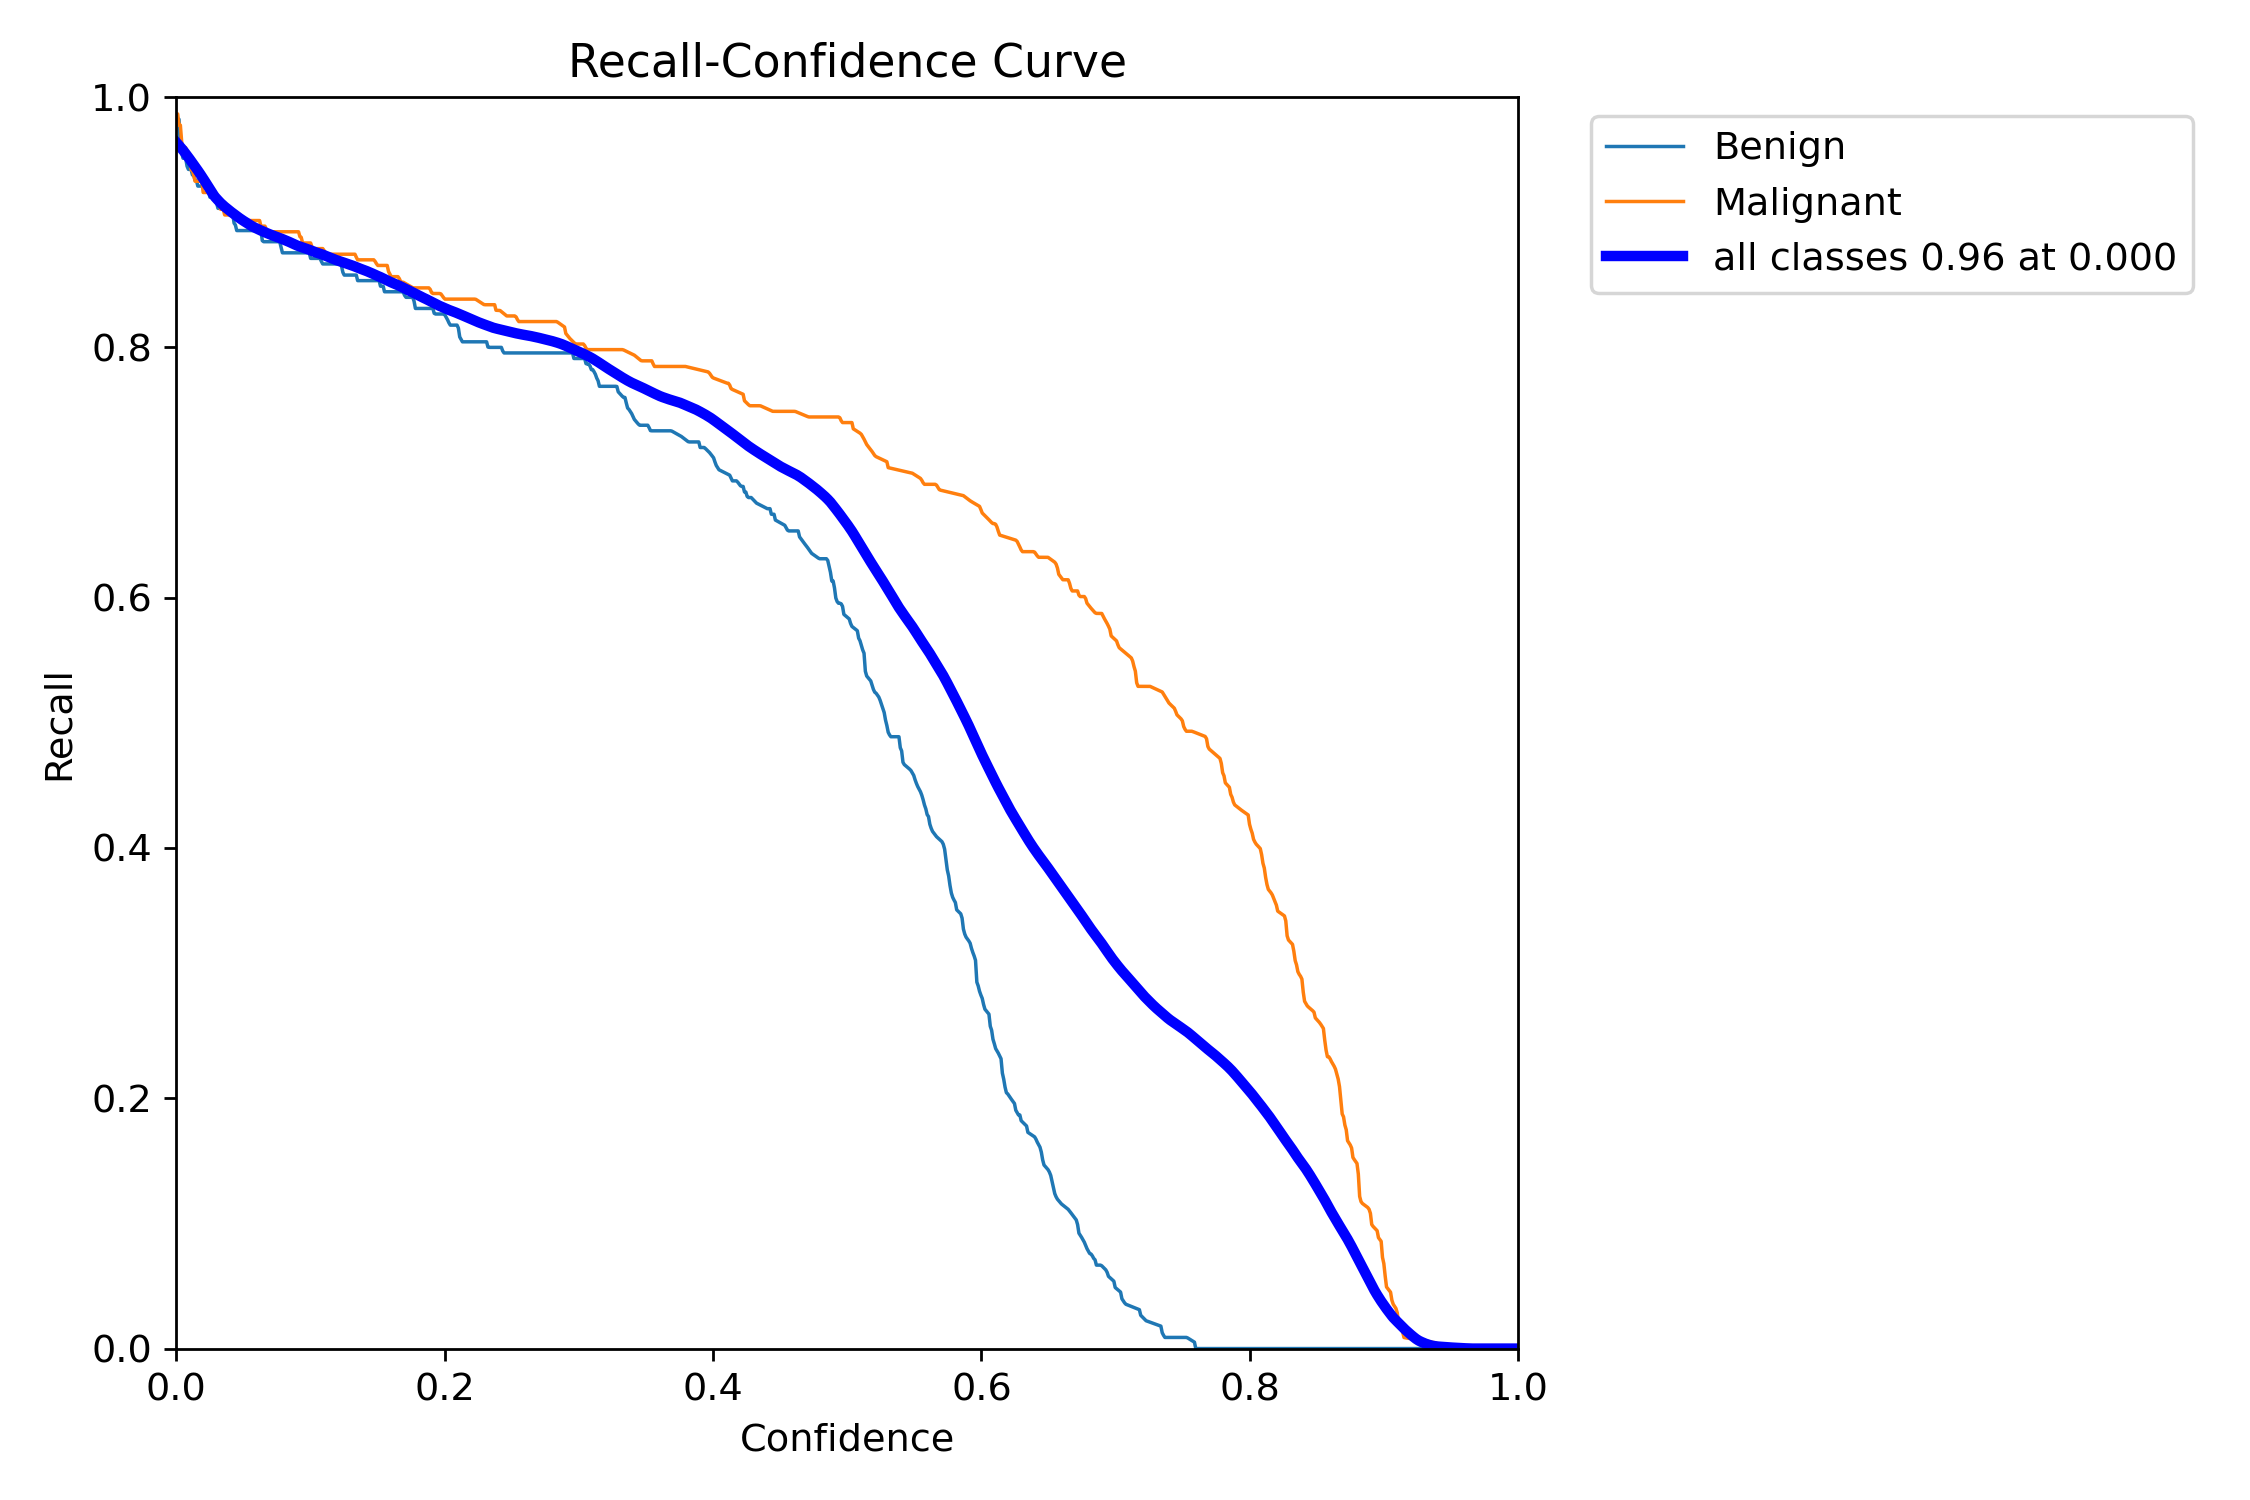

In [47]:
Image(filename='/kaggle/working/runs/detect/val/R_curve.png', width=600)

# Final Result

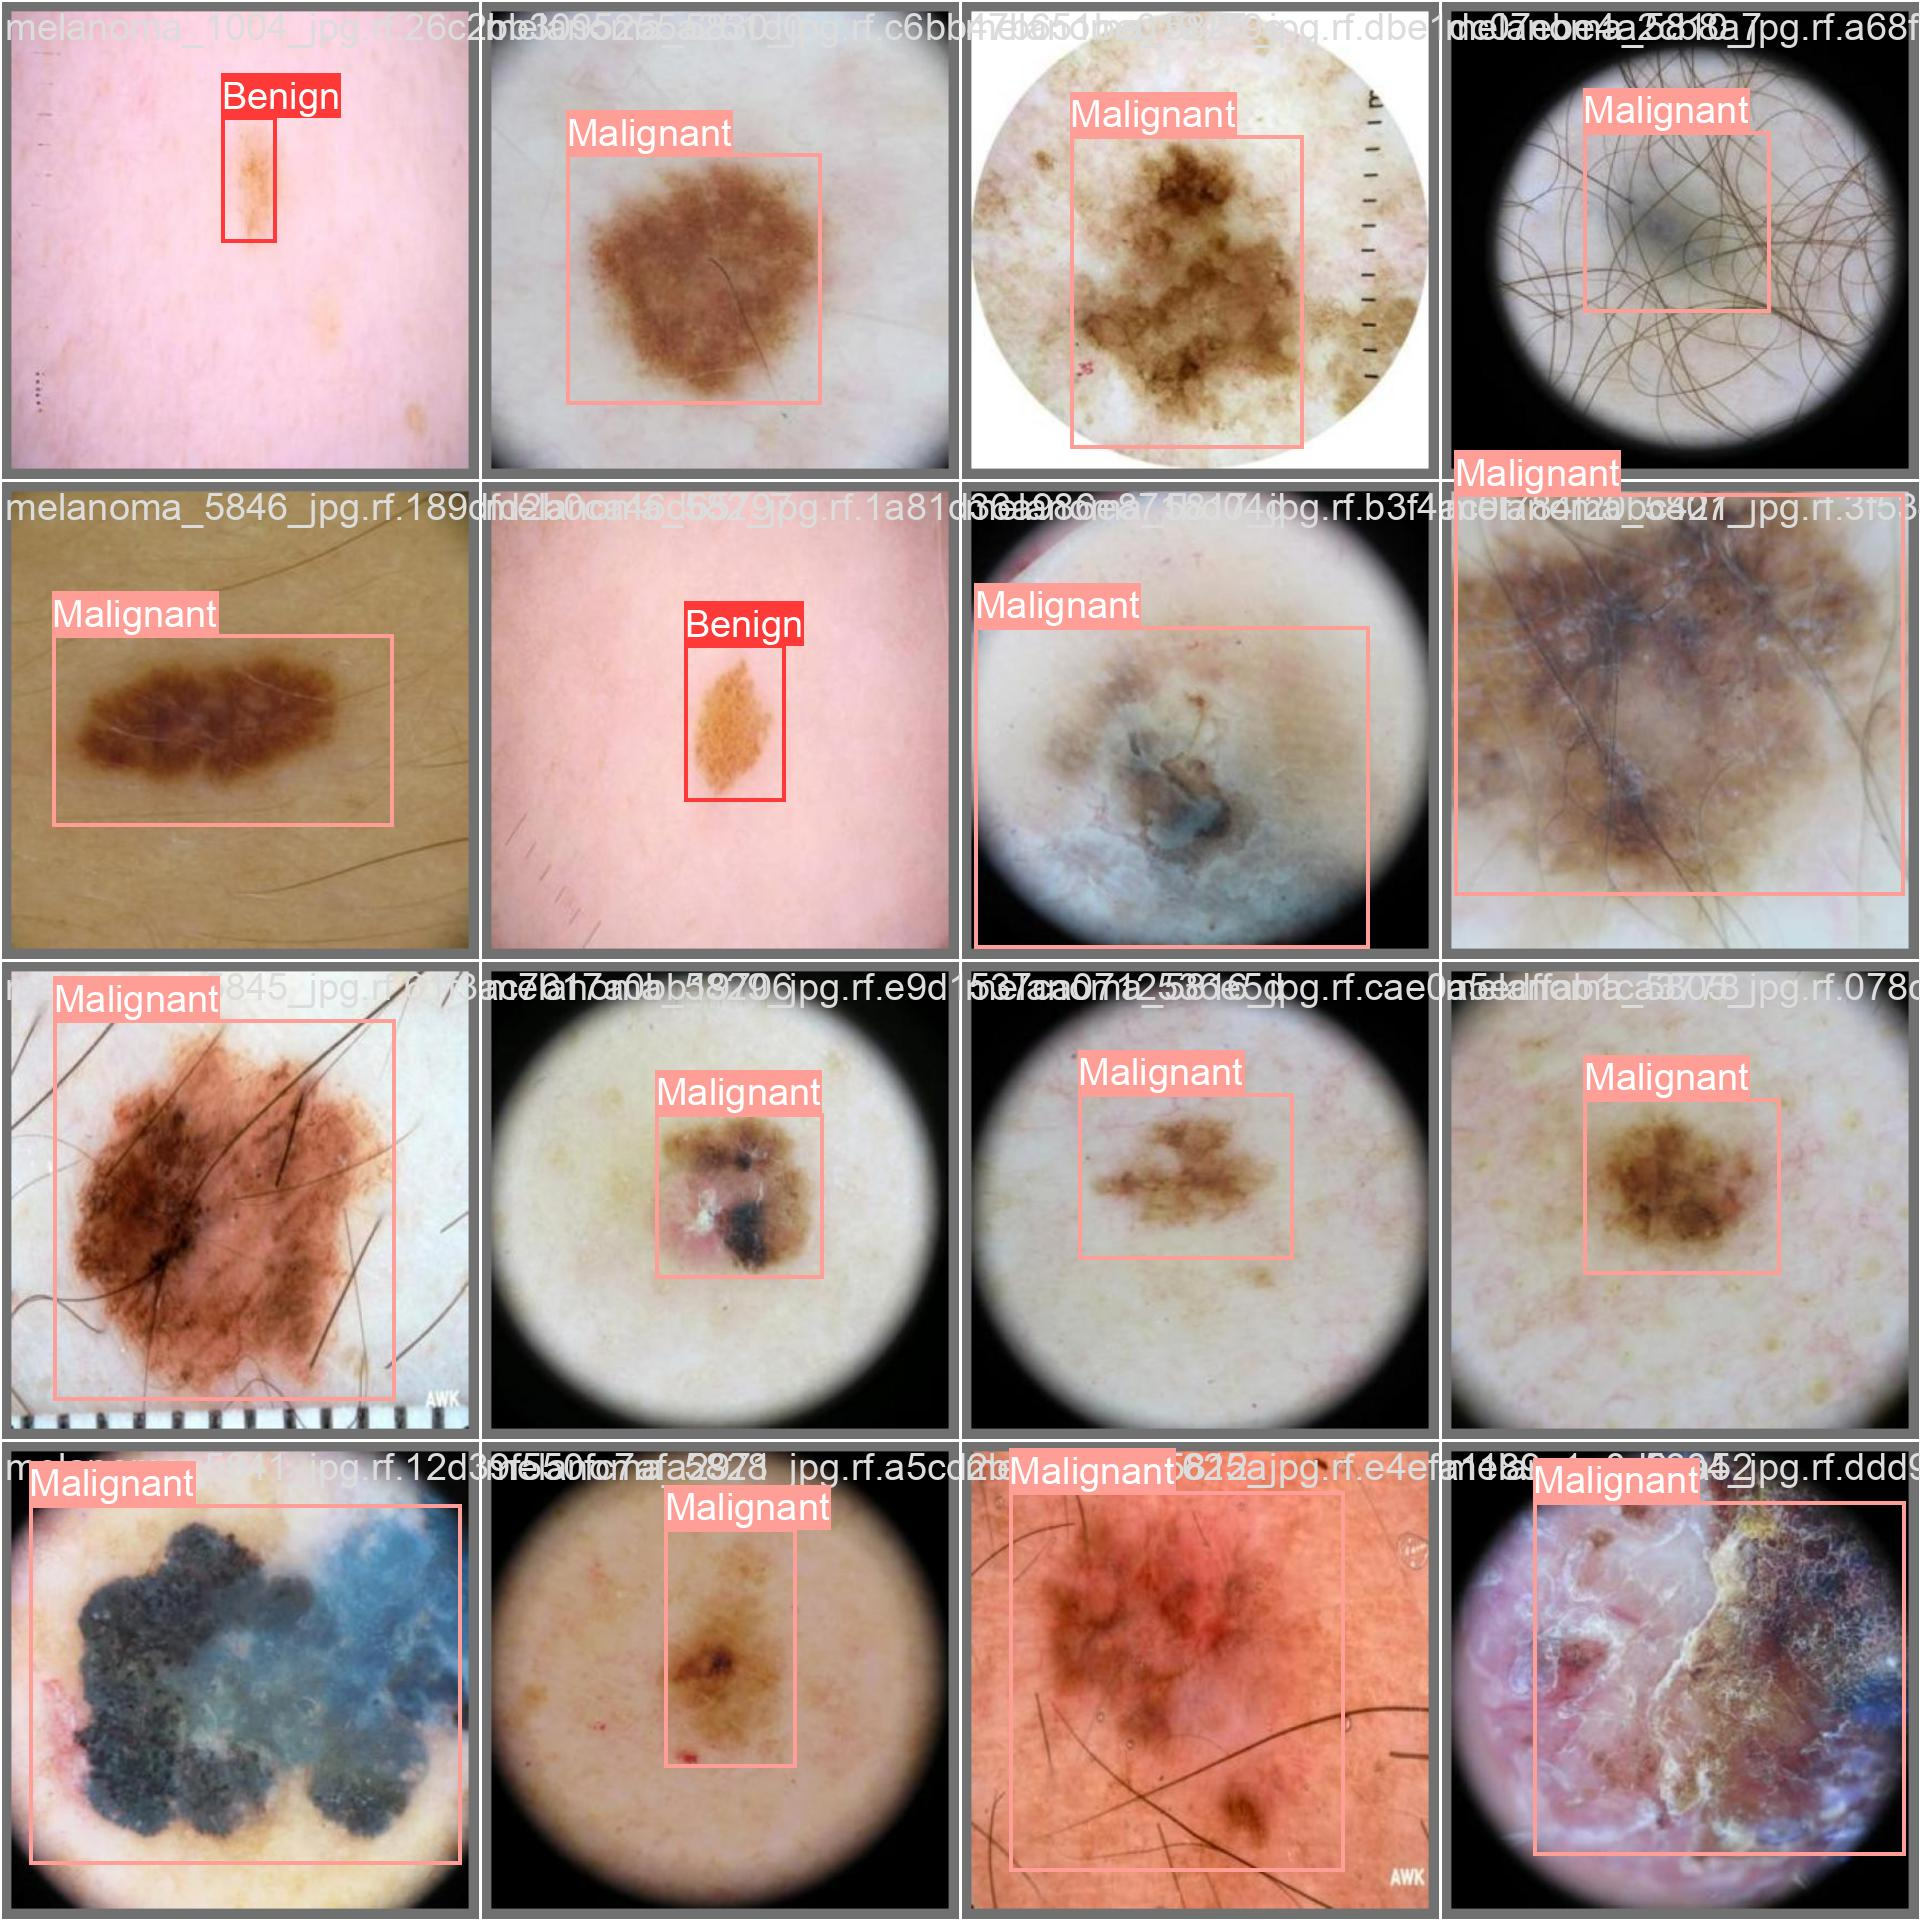

In [45]:
Image(filename='/kaggle/working/runs/detect/train/val_batch0_labels.jpg', width=600)

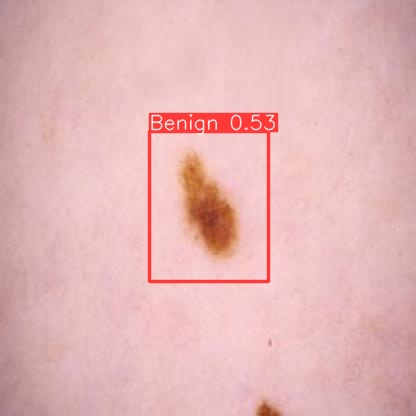

In [41]:
Image(filename='/kaggle/working/runs/detect/predict/melanoma_412_jpg.rf.2b78d9d158771555858399ff21b02806.jpg',width=300)

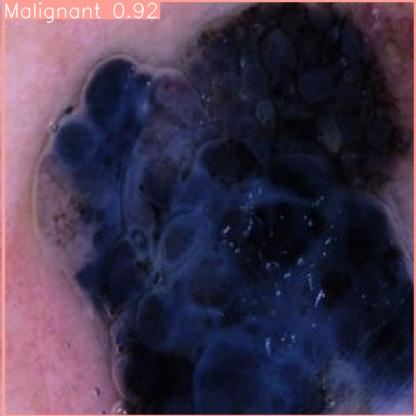

In [44]:
Image(filename='/kaggle/working/runs/detect/predict/melanoma_5130_jpg.rf.26e9e5bf17444b5d6d5ff0f66275ae9f.jpg',width=300)

# Validate Model

In [56]:
!yolo task=detect mode=val model=/kaggle/working/runs/detect/train/weights/best.pt data=/kaggle/input/data-y/data.yaml


Ultralytics YOLOv8.0.223 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 268 layers, 68125494 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /kaggle/working/Skin-Cancer-Detection-2/valid/labels.cache... 410 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        410        448       0.81      0.781      0.823      0.501
                Benign        410        225      0.789      0.764      0.764      0.381
             Malignant        410        223      0.831      0.798      0.882       0.62
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Speed: 0.7ms preprocess, 27.1ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs